# Getting the Data

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler


import seaborn as sns
import matplotlib.pyplot as plt

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 


> Get The Data

In [2]:
data = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

> preview the data

In [3]:
data.head(2)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [5]:
data.shape

(16719, 16)

# Data Engineering

In [6]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [7]:
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

**As You See We Have Many Nulls And Empty Cells So We Handle It**

In [8]:
Ndata = data.dropna(inplace=True)
Ndata = data.reset_index(drop=True)

In [9]:
Ndata.shape

(6825, 16)

In [10]:
Ndata.head(2)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E


In [11]:
Ndata.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [12]:
Ndata.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [13]:
Ndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 853.2+ KB


## Drop the features That We Dom't Use In Forcasting:

* Name
* Publisher
* Developer
* NA_Sales
* EU_Sales
* JP_Sales
* Other_Sales

In [14]:
Ndata = Ndata.drop(['Name', 'Year_of_Release','Publisher', 'Developer', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)

In [15]:
Ndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Platform      6825 non-null   object 
 1   Genre         6825 non-null   object 
 2   Global_Sales  6825 non-null   float64
 3   Critic_Score  6825 non-null   float64
 4   Critic_Count  6825 non-null   float64
 5   User_Score    6825 non-null   object 
 6   User_Count    6825 non-null   float64
 7   Rating        6825 non-null   object 
dtypes: float64(4), object(4)
memory usage: 426.7+ KB


<Axes: >

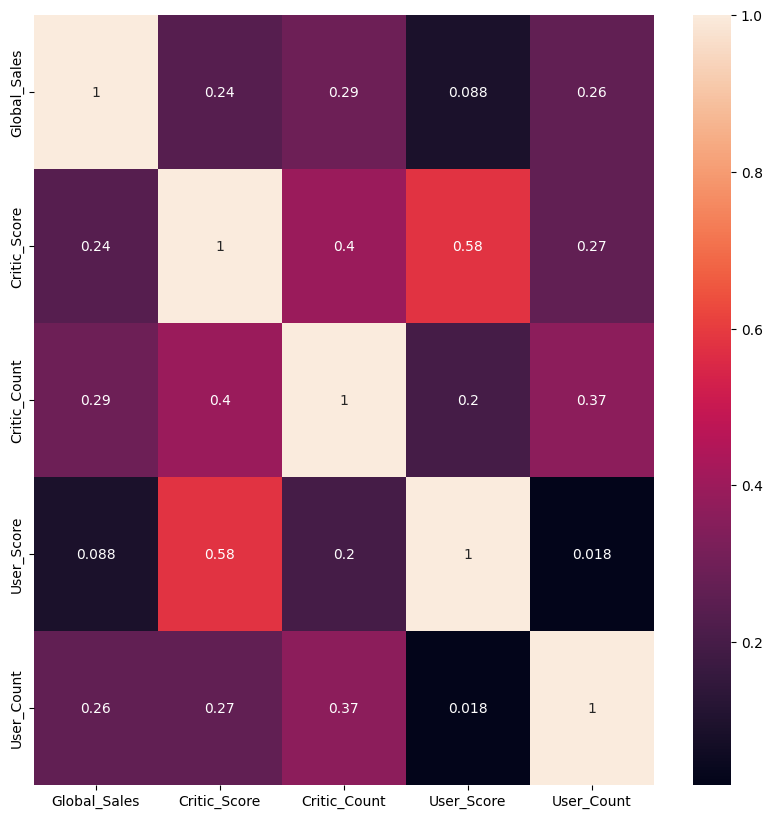

In [16]:
#Exploration
Ndata= Ndata.astype({'User_Score': float})

#Only Numeric Columns
data=Ndata[['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']]

plt.figure(figsize = (10, 10))
sns.heatmap(data.corr(), annot = True)

## Check The Data Type

In [17]:
print(pd.value_counts(Ndata["Platform"]))
print("-------------------------------")
Ndata = Ndata.drop(Ndata[Ndata.Platform.isin(["DC", "WiiU" ,"PSV" ,"PS", "3DS", "XOne", "GBA", "PS4", "GC", "PSP"]) ].index ) #Drop These Because Those Are Outlaier < 400
print("-------------------------------")
print(pd.value_counts(Ndata["Platform"]))

Platform
PS2     1140
X360     858
PS3      769
PC       651
XB       565
Wii      479
DS       464
PSP      390
GC       348
PS4      239
GBA      237
XOne     159
3DS      155
PS       150
PSV      118
WiiU      89
DC        14
Name: count, dtype: int64
-------------------------------
-------------------------------
Platform
PS2     1140
X360     858
PS3      769
PC       651
XB       565
Wii      479
DS       464
Name: count, dtype: int64


In [18]:
print(pd.value_counts(Ndata["Genre"]))
print("-------------------------------")
Ndata = Ndata.drop(Ndata[Ndata.Genre.isin(["Puzzle", "Adventure" ,"Platform" ,"Strategy", "Simulation", "Fighting", "Misc"]) ].index ) #Drop These Because Those Are Outlaier < 400
print("-------------------------------")
print(pd.value_counts(Ndata["Genre"]))

Genre
Action          1150
Sports           695
Shooter          693
Role-Playing     467
Racing           431
Misc             282
Fighting         259
Simulation       253
Strategy         226
Platform         220
Adventure        170
Puzzle            80
Name: count, dtype: int64
-------------------------------
-------------------------------
Genre
Action          1150
Sports           695
Shooter          693
Role-Playing     467
Racing           431
Name: count, dtype: int64


**Drop [AO, K-A, RP] Because Those Are Outlaier**

In [19]:
print(pd.value_counts(Ndata["Rating"]))
Ndata = Ndata.drop(Ndata[Ndata.Rating.isin(["AO","K-A","RP"]) ].index ) #Drop These Because Those Are Outlaier
print(pd.value_counts(Ndata["Rating"]))

Rating
T       1066
M       1005
E        951
E10+     413
AO         1
Name: count, dtype: int64
Rating
T       1066
M       1005
E        951
E10+     413
Name: count, dtype: int64


**Change The Type Of User_Score Into Float**

In [20]:
Ndata= Ndata.astype({'User_Score': float})

### Create Dummies for:

* Platform
* Genre
* Rating

In [21]:
print(Ndata.shape) #pre-dummies shape
Ndata = pd.get_dummies(data=Ndata, columns=['Platform', 'Genre', 'Rating'])
print(Ndata.shape) #post-dummies shape
Ndata.head(2) #Check to verify that dummies are ok

(3435, 8)
(3435, 21)


,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Platform_DS,Platform_PC,Platform_PS2,Platform_PS3,Platform_Wii,...,Platform_XB,Genre_Action,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Sports,Rating_E,Rating_E10+,Rating_M,Rating_T
0,82.53,76.0,51.0,8.0,322.0,False,False,False,False,True,...,False,False,False,False,False,True,True,False,False,False
1,35.52,82.0,73.0,8.3,709.0,False,False,False,False,True,...,False,False,True,False,False,False,True,False,False,False


### Now Take A look After Some Transformation

In [22]:
Ndata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3435 entries, 0 to 6823
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Global_Sales        3435 non-null   float64
 1   Critic_Score        3435 non-null   float64
 2   Critic_Count        3435 non-null   float64
 3   User_Score          3435 non-null   float64
 4   User_Count          3435 non-null   float64
 5   Platform_DS         3435 non-null   bool   
 6   Platform_PC         3435 non-null   bool   
 7   Platform_PS2        3435 non-null   bool   
 8   Platform_PS3        3435 non-null   bool   
 9   Platform_Wii        3435 non-null   bool   
 10  Platform_X360       3435 non-null   bool   
 11  Platform_XB         3435 non-null   bool   
 12  Genre_Action        3435 non-null   bool   
 13  Genre_Racing        3435 non-null   bool   
 14  Genre_Role-Playing  3435 non-null   bool   
 15  Genre_Shooter       3435 non-null   bool   
 16  Genre_Sport

**Now Let's Defined Our Featuers & Target That We Will Use For Forcasting**

In [23]:
X = Ndata.drop('Global_Sales', axis=1)
y = ( Ndata[['Global_Sales']] ).to_numpy()

In [24]:
scaler = StandardScaler()

SX = scaler.fit_transform(X)

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(SX, y, test_size=0.25, random_state=12)

#Let's check the shape of the split data as a precaution
print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(Y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("Y_test shape: {}".format(Y_test.shape))

X_train shape: (2576, 20)
Y_train shape: (2576, 1)
X_test shape: (859, 20)
Y_test shape: (859, 1)


**We Will Use :** 

* Linear Regression

* Support Vector Regressor


## Linear Regression 

In [26]:
from sklearn.linear_model import LinearRegression
LRModel =LinearRegression()
LRModel.fit(X_train, Y_train)

Score = LRModel.score(X_test, Y_test)

print(f"THe Score IS {Score*100 :.1f} %")

THe Score IS 24.3 %


In [27]:
from sklearn.metrics import mean_squared_error

Y_pred = LRModel.predict(X_test)

print(f"The Meas Square Error Is : {mean_squared_error(Y_test,Y_pred) :.2f}")

The Meas Square Error Is : 2.43


## SVR

**Here I Use GridSeach To Get Best Score**

In [33]:
PSVR ={
      'kernel': ['linear', 'rbf'],
      'C':[1, 2, 3, 4],
      'gamma':[0.1, 1]
      }

In [34]:
from sklearn.svm import SVR

grid_search_svr = GridSearchCV(SVR(), PSVR, cv=5)
grid_search_svr.fit(X_train, Y_train)
print("Best parameters: {}".format(grid_search_svr.best_params_))
print("Best score: {:.2f}".format(grid_search_svr.best_score_))
print("Best Estimator: {}".format(grid_search_svr.best_estimator_))

Best parameters: {'C': 4, 'gamma': 0.1, 'kernel': 'rbf'}
Best score: 0.31
Best Estimator: SVR(C=4, gamma=0.1)


# Thank You